In [24]:
import matplotlib
import matplotlib.pyplot as plots
%matplotlib inline
import numpy as np
import pandas as pd
import math

In [25]:
data = pd.read_csv('/content/test.csv')

In [26]:
data

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


1)

In [27]:
data1= data[['Maternal Smoker', 'Maternal Age']]
data1

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [28]:
maternalsmoker = data1['Maternal Age'] [data1['Maternal Smoker'] == True]
maternalsmoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [29]:
non_maternalsmoker = data1['Maternal Age'] [data1['Maternal Smoker'] == False]
non_maternalsmoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5100d46fd0>,
      dtype=object)

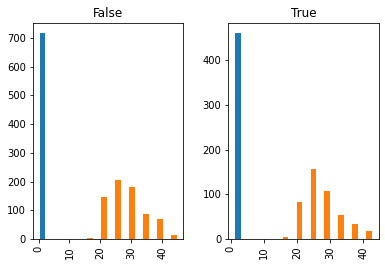

In [30]:
data1.hist(by ='Maternal Smoker')

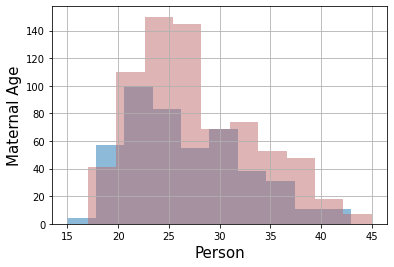

In [38]:
import seaborn as sns
maternalsmoker.hist(histtype='stepfilled', alpha=.5, bins=10)   
non_maternalsmoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plots.xlabel('Person',fontsize=15)
plots.ylabel('Maternal Age',fontsize=15)
plots.show()


1)
The distribution of Maternal Age to mothers who smoked appears to be shifted slightly to the left of the distribution corresponding to non-smoking mothers. The Maternal age of the mothers who smoked seem lower, on average than the 
Maternal age of the non-smokers.

2)
Test Statistic :
AB Testing is used,So Difference between 2 groups is taken as statistic

In [41]:
#Interpretation
mean_table = data1.groupby('Maternal Smoker').mean()
mean_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [45]:
obs_diff =abs( mean_table['Maternal Age'][1] - mean_table['Maternal Age'][0])
obs_diff

0.8076725017901509

3)
ALTERNATE HYPOTHESIS(mu1) : Average age of mothers who smoked is less than those who did not smoke

NULL HYPOTHESIS(mu0) : 
Average age of mothers who smoked are same as who did not smoke



4) **Test Statistic**
The alternative hypothesis compares the average Maternal Age of the two groups and says that the average for the mothers who smoke is smaller. Therefore it is reasonable for us to use the difference between the two group means as our statistic.(AB TEST)

We will do the subtraction in the order "average Maternal Age of the smoking group - average Maternal Age of the non-smoking group". Small values (that is, negative values) of this statistic will favor the alternative hypothesis

In [48]:
# Now Taking Sample of  the Test Statistic :
random = data1.sample(1174,replace = False)
random

,Maternal Smoker,Maternal Age
603,False,35
1124,False,24
941,False,25
639,False,19
176,False,22
...,...,...
938,True,37
1055,False,21
94,False,33
985,False,24


In [54]:
random_ages = random['Maternal Age']
original_and_shuffled = data1.assign(random_ages =  random_ages.values)
original_and_shuffled

,Maternal Smoker,Maternal Age,random_ages
0,False,27,35
1,False,33,24
2,True,28,25
3,True,23,19
4,False,25,22
...,...,...,...
1169,False,27,37
1170,False,24,21
1171,True,30,33
1172,False,21,24


In [55]:
all_group_means = original_and_shuffled.groupby('Maternal Smoker').mean()
all_group_means

,Maternal Age,random_ages
Maternal Smoker,,
False,27.544056,27.400000
True,26.736383,26.960784


In [56]:
randomdifference = abs(all_group_means['random_ages'][0]- all_group_means['random_ages'][1])
randomdifference

0.43921568627450824

One-Stimulation

In [57]:
smoking_and_MaternalAGE = data[['Maternal Smoker', 'Maternal Age']]
shuffled = smoking_and_MaternalAGE.sample(1174,replace = False)
shuffled_age = shuffled['Maternal Age']
original_and_shuffled = smoking_and_MaternalAGE.assign(shuffled_age=shuffled_age.values )
all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
difference = all_group_means['shuffled_age'][0]- all_group_means['shuffled_age'][1]
difference

-0.02940414705120631

Permutation test

In [58]:
import numpy as np
import array
differences = np.zeros(5000)

In [60]:
for i in np.arange(5000):
    smoking_and_MaternalAGE = data[['Maternal Smoker', 'Birth Weight']]
    shuffled = smoking_and_MaternalAGE.sample(1174,replace = False)
    shuffled_weights = shuffled['Birth Weight']
    original_and_shuffled = smoking_and_MaternalAGE.assign(shuffled_weights=shuffled_weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    difference = all_group_means['shuffled_weights'][1]- all_group_means['shuffled_weights'][0]
    differences[i] = difference

In [61]:
data2 = pd.DataFrame(differences)


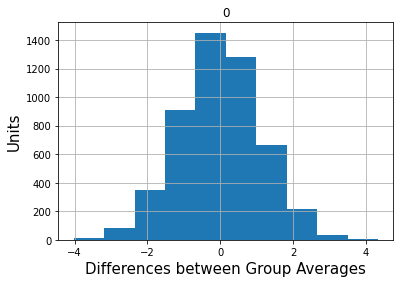

In [64]:
data2.hist(bins = 10)
plots.xlabel('Differences between Group Averages',fontsize=15)
plots.ylabel('Units',fontsize=15);
plots.scatter(obs_diff,100,color='red',s=30)
plots.show()

In [66]:
Empirical_Pvalue = np.count_nonzero(differences <= obs_diff)/differences.size